This notebook plots the data associated with Figure 2E

In [1]:
import seaborn as sns
import pandas as pd
from os.path import exists
import glob

from statannotations.Annotator import Annotator

import os 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab

#from mycolorpy import colorlist as mcp

from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

import scipy as scipy
from scipy import optimize

from soursop.sstrajectory import SSTrajectory
import mdtraj as md

import csv

# define this so we can read in nucleotides
NA_EXTENSION = ['D5P', 'DPC',  'DPU',  'DPT',  'DPA',  'DPG',  'R5P',  'RPC' , 'RPU',  'RPT',  'RPA',  'RPG']

# molecular weight of N protein (g/mol)
MW_N = 18850
M2nM=1e9

# importing mean()
from statistics import mean
  
def Average(lst):
    return mean(lst)

import numpy as np

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['legend.fontsize'] = 6

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
pd.set_option('display.precision', 9)  # Setting the precision of decimal places for floating-point numbers

path = r'./Analysis/Data/'  # Defining the path to the data directory (change it to your desired path)
all_files = glob.glob(os.path.join(path, "*Ka.csv"))  # Finding all files in the specified path with a pattern

Total = []  # Creating an empty list to store data

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)  # Concatenating all CSV files into a single DataFrame

df = df.reindex(sorted(df.columns), axis=1)  # Sorting the columns of the DataFrame in alphabetical order

df_melted = pd.melt(df)  # Melting the DataFrame to convert it from wide to long format

# Splitting the 'variable' column into three separate columns: 'NTD', 'Replicate', 'Measurement'
#df_structured = df_melted.join(df_melted['variable'].str.split('_', 3, expand=True).rename(columns={0: 'NTD', 1: 'Replicate', 2: 'Measurement'}))

df_structured = df_melted.join(
    df_melted['variable']
    .str.split('_', n=3, expand=True)
    .rename(columns={0: 'NTD', 1: 'Replicate', 2: 'Measurement'})
)

df_structured  # Returning the final structured DataFrame

df_structured[200:255]

,variable,value,NTD,Replicate,Measurement
200,RBD_4_Ka,0.000009826,RBD,4,Ka
201,RBD_4_Ka,0.000011616,RBD,4,Ka
202,RBD_4_Ka,0.000012145,RBD,4,Ka
203,RBD_4_Ka,0.000015984,RBD,4,Ka
204,RBD_4_Ka,0.000018290,RBD,4,Ka
205,RBD_4_Ka,0.000017434,RBD,4,Ka
206,RBD_4_Ka,0.000016967,RBD,4,Ka
207,RBD_4_Ka,0.000017054,RBD,4,Ka
208,RBD_4_Ka,0.000017366,RBD,4,Ka
209,RBD_4_Ka,0.000017277,RBD,4,Ka


In [3]:
pd.set_option('display.precision', 9)  # Setting the precision of decimal places for floating-point numbers

path = r'./Analysis/Data/'  # Defining the path to the data directory (change it to your desired path)
all_files = glob.glob(os.path.join(path, "*Ka.csv"))  # Finding all files in the specified path with a pattern

Total = []  # Creating an empty list to store data

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)  # Concatenating all CSV files into a single DataFrame

df = df.reindex(sorted(df.columns), axis=1)  # Sorting the columns of the DataFrame in alphabetical order

df_melted = pd.melt(df)  # Melting the DataFrame to convert it from wide to long format

# Splitting the 'variable' column into three separate columns: 'NTD', 'Replicate', 'Measurement'
df_structured = df_melted.join(df_melted['variable'].str.split('_', n=3, expand=True).rename(columns={0: 'NTD', 1: 'Replicate', 2: 'Measurement'}))

# Generating a new column 'Ka*' which is the 'value' column divided by the mean of values where NTD is equal to 'SCO2'
df_structured['Ka*'] = df_structured['value'] / df_structured[df_structured['NTD'] == 'SCO2']['value'].mean()

df_structured  # Returning the final structured DataFrame


,variable,value,NTD,Replicate,Measurement,Ka*
0,GS10_1_Ka,0.000002594,GS10,1,Ka,0.010163567
1,GS10_1_Ka,0.000001944,GS10,1,Ka,0.007615829
2,GS10_1_Ka,0.000002150,GS10,1,Ka,0.008421995
3,GS10_1_Ka,0.000001921,GS10,1,Ka,0.007527222
4,GS10_1_Ka,0.000002059,GS10,1,Ka,0.008067466
...,...,...,...,...,...,...
295,SCO2_5_Ka,0.000327736,SCO2,5,Ka,1.284065584
296,SCO2_5_Ka,0.000308462,SCO2,5,Ka,1.208550461
297,SCO2_5_Ka,0.000287011,SCO2,5,Ka,1.124506529
298,SCO2_5_Ka,0.000273092,SCO2,5,Ka,1.069973266


In [5]:
print(f"WT Ka value: {df_structured[df_structured['NTD'] == 'SCO2']['value'].mean()}")

WT Ka value: 0.0002552330029136905


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RBD vs. GS10: Mann-Whitney-Wilcoxon test two-sided, P_val:2.112e-11 U_stat=4.595e+03
GS10 vs. GS25: Mann-Whitney-Wilcoxon test two-sided, P_val:3.013e-01 U_stat=2.537e+03
RBD vs. GS25: Mann-Whitney-Wilcoxon test two-sided, P_val:3.926e-13 U_stat=4.744e+03
SCO2 vs. GS10: Mann-Whitney-Wilcoxon test two-sided, P_val:4.125e-26 U_stat=5.625e+03
SCO2 vs. GS25: Mann-Whitney-Wilcoxon test two-sided, P_val:4.125e-26 U_stat=5.625e+03


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_70754/360469243.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_structured, x=x, y=y, order=order, zorder=2, palette=palette, ax=ax)


(<Axes: xlabel='NTD', ylabel='Ka*'>,
  <statannotations.Annotation.Annotation at 0x17308bb10>])

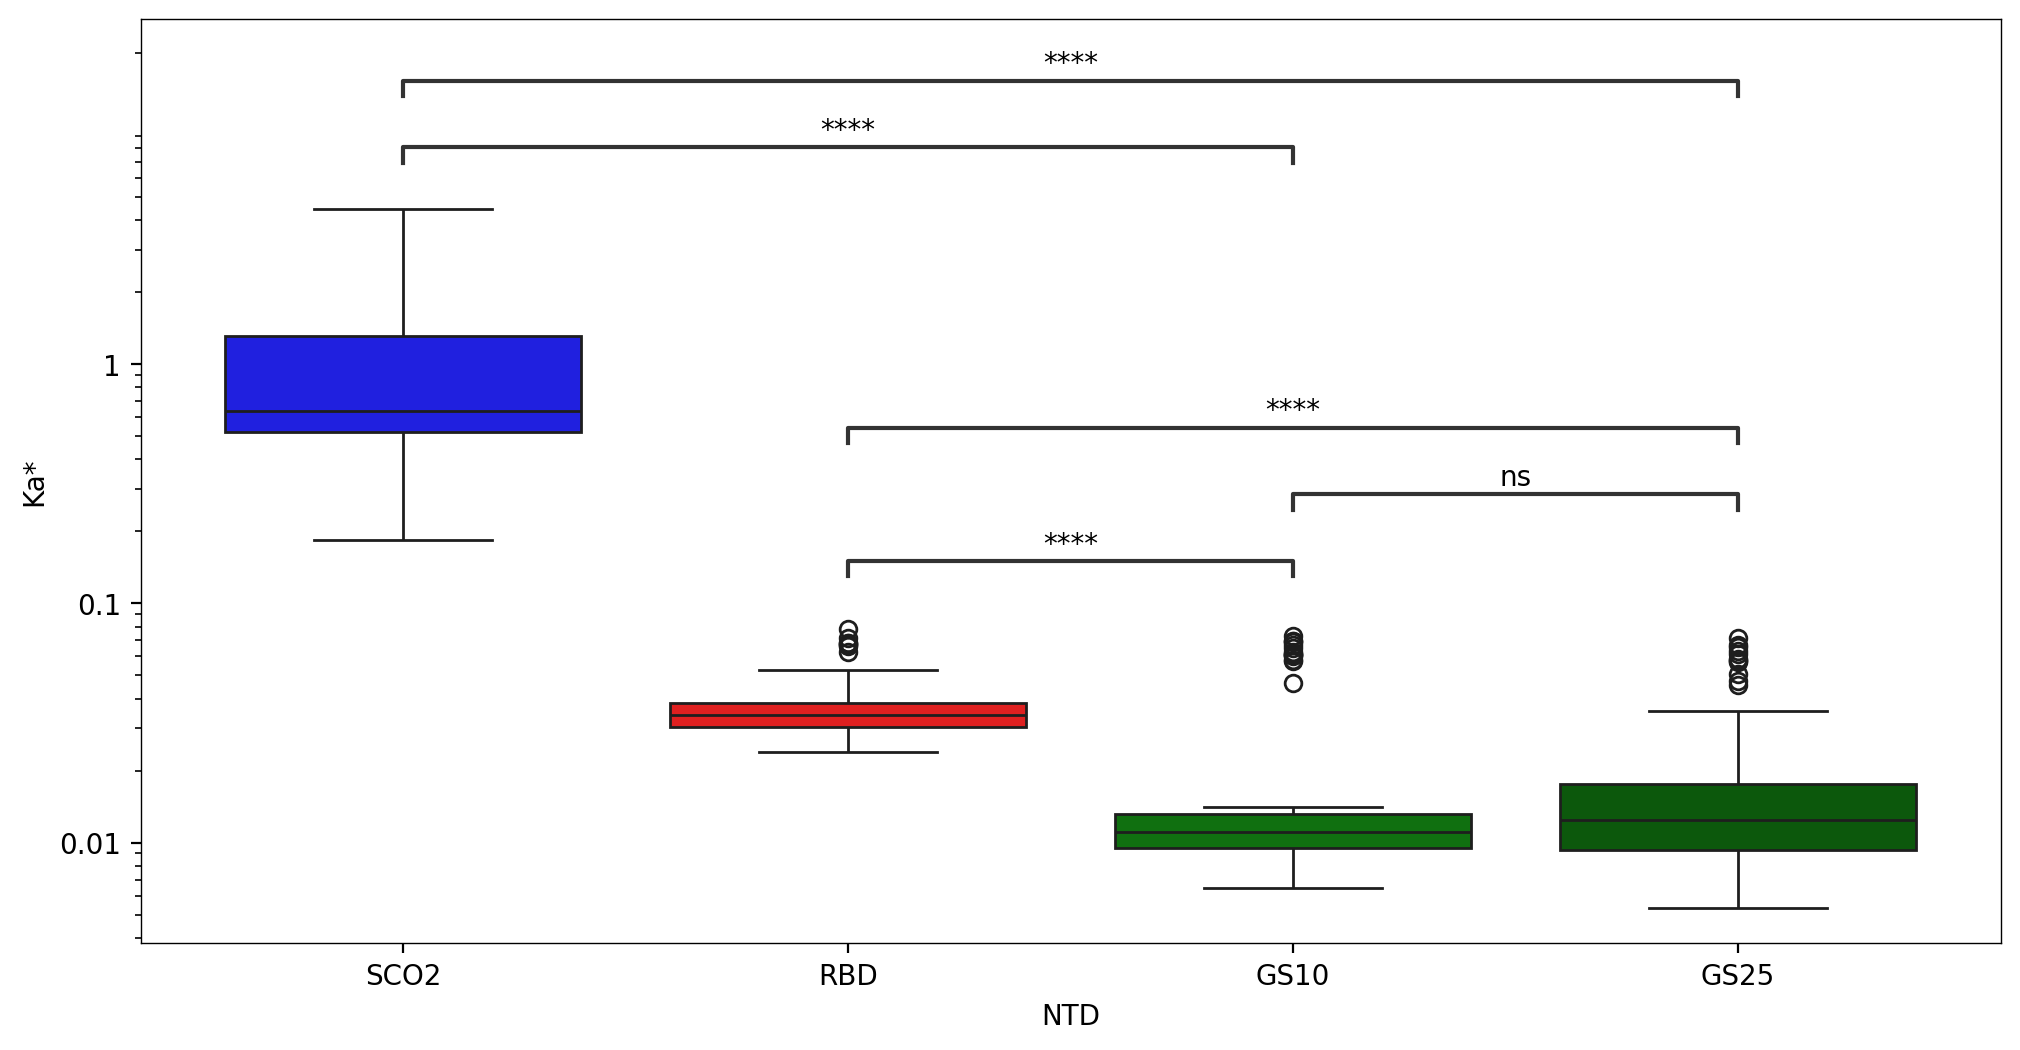

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

x = "NTD"
y = "Ka*"
order = ['SCO2','RBD','GS10', 'GS25']
palette = {'GS10': 'green', 'GS25': 'darkgreen', 'SCO2': 'blue', 'RBD': 'red'}

sns.boxplot(data=df_structured, x=x, y=y, order=order, zorder=2, palette=palette, ax=ax)

box_pairs = [("GS10", "RBD"), ("GS25", "RBD"),("GS10", "GS25"), ("GS10", "SCO2"), ("GS25", "SCO2")]

annotator = Annotator(ax, box_pairs, data=df_structured, x=x, y=y, order=order)
annotator.configure(test='Mann-Whitney', text_format='star', verbose=2)
test_results = annotator.apply_and_annotate()

fig.savefig('Analysis/Plots/GS_box_plot.png', format='png')
fig.savefig('Analysis/Plots/GS_box_plot.pdf', format='pdf')

test_results

In [5]:
print(df_structured.columns.tolist())

['variable', 'value', 'NTD', 'Replicate', 'Measurement', 'Ka*']


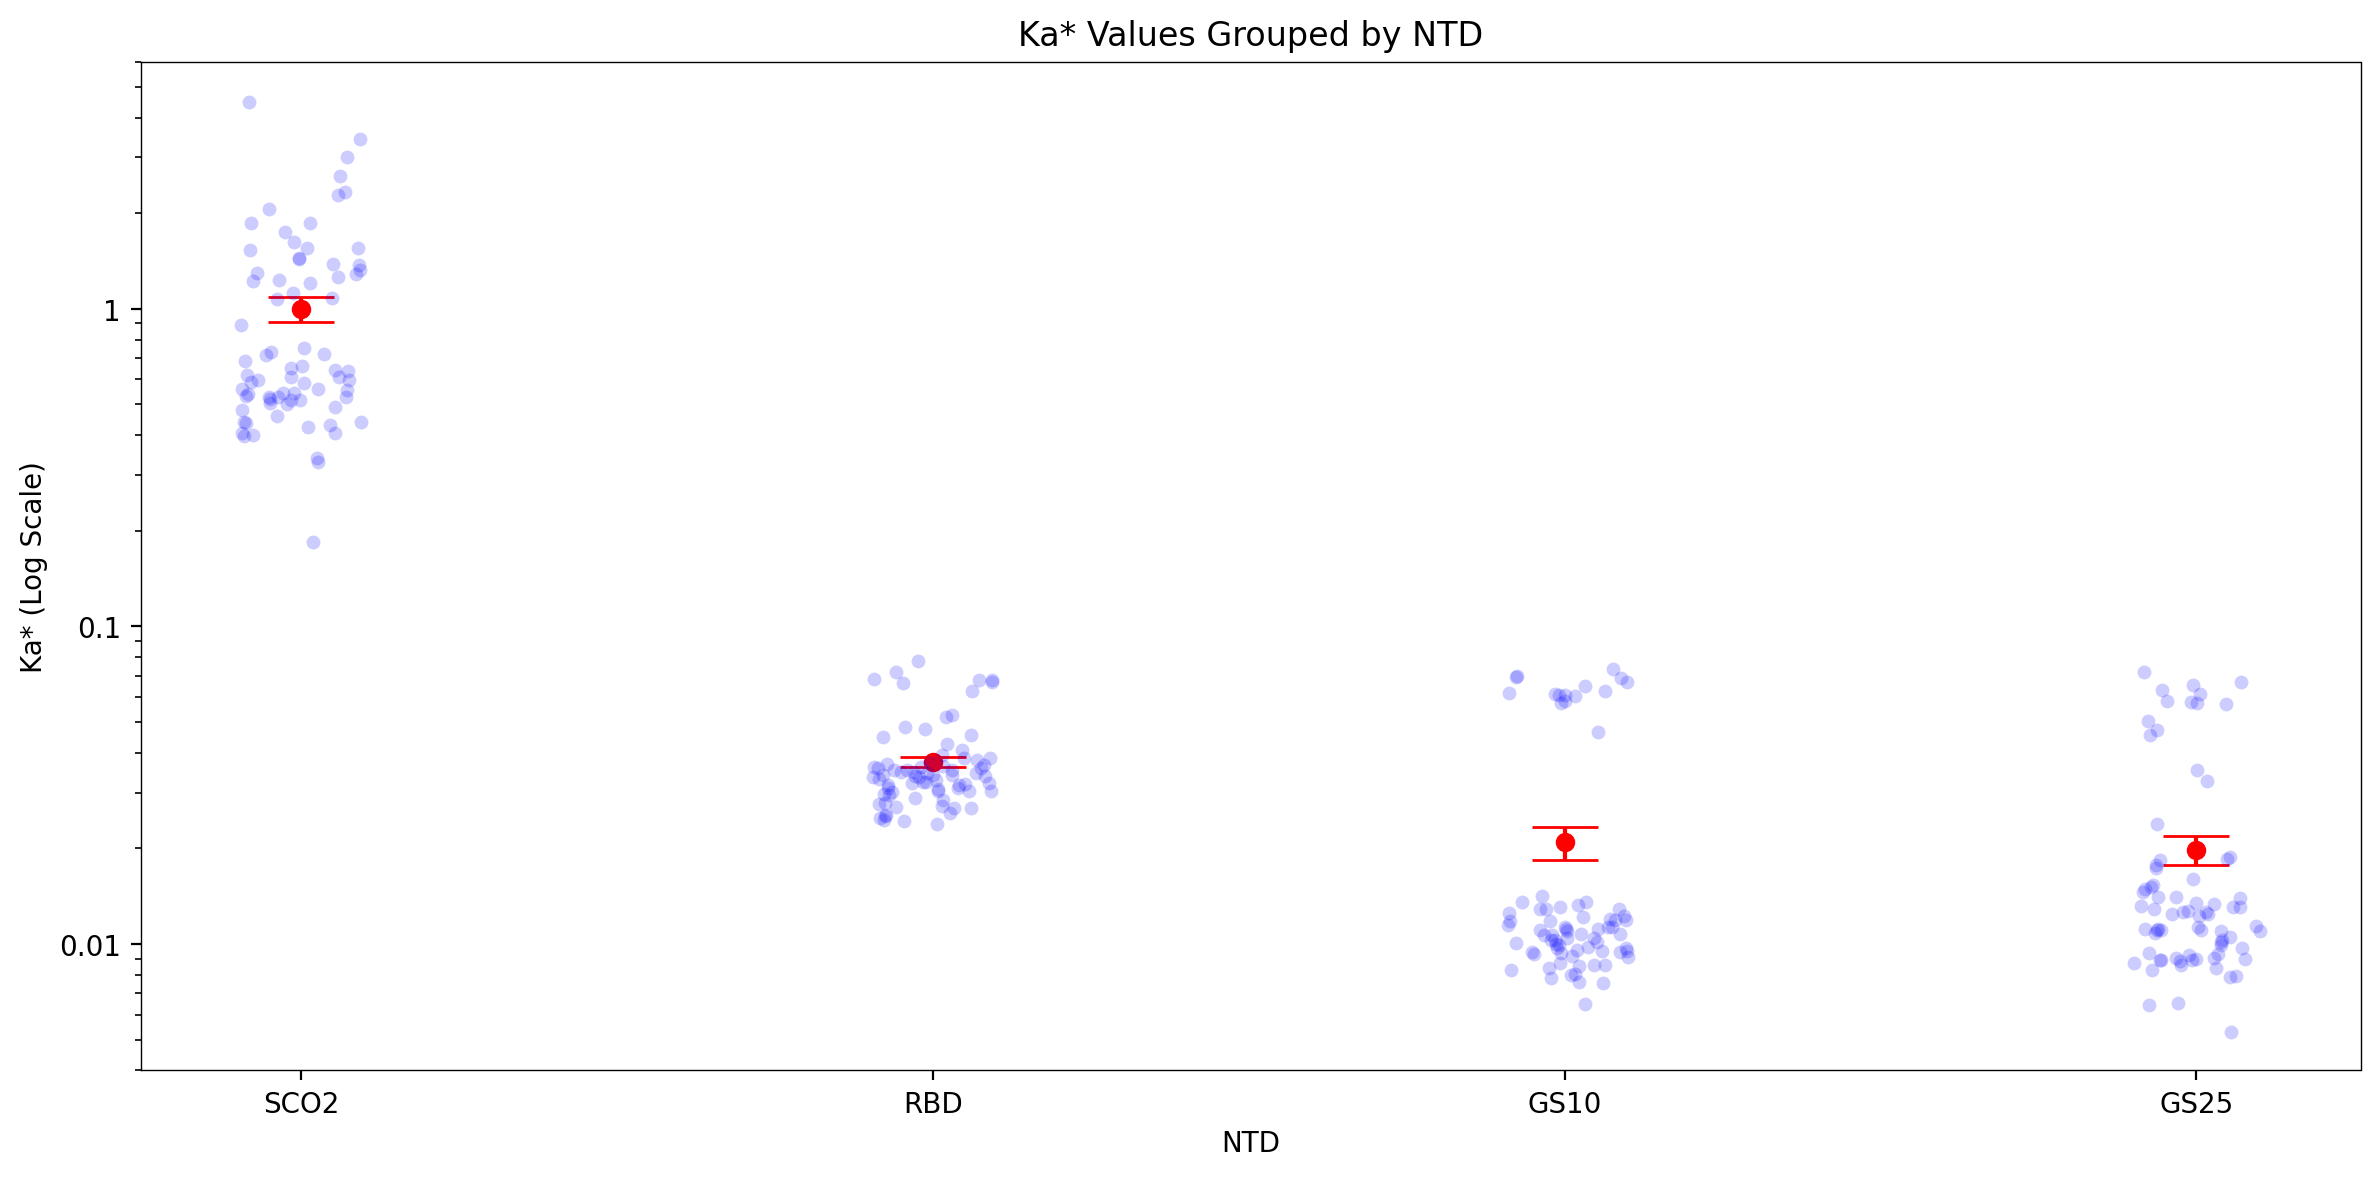

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

order = ['SCO2', 'RBD', 'GS10', 'GS25']

# Strip plot
sns.stripplot(data=df_structured, x='NTD', y='Ka*', color='blue', alpha=0.2, order=order, ax=ax)

# Compute means and SEMs
grouped = df_structured.groupby('NTD')['Ka*'].agg(['mean', 'sem']).reindex(order)

# Overlay means with error bars
ax.errorbar(
    x=range(len(order)),
    y=grouped['mean'],
    yerr=grouped['sem'],
    fmt='o',
    color='red',
    capsize=12    
)

ax.set_ylim(0.004, 6)
ax.set_xlabel('NTD')
ax.set_ylabel('Ka* (Log Scale)')
ax.set_title('Ka* Values Grouped by NTD')

fig.tight_layout()

fig.savefig('Analysis/Plots/GS_strip_plot.png', format='png')
fig.savefig('Analysis/Plots/GS_strip_plot.pdf', format='pdf')
plt.show()

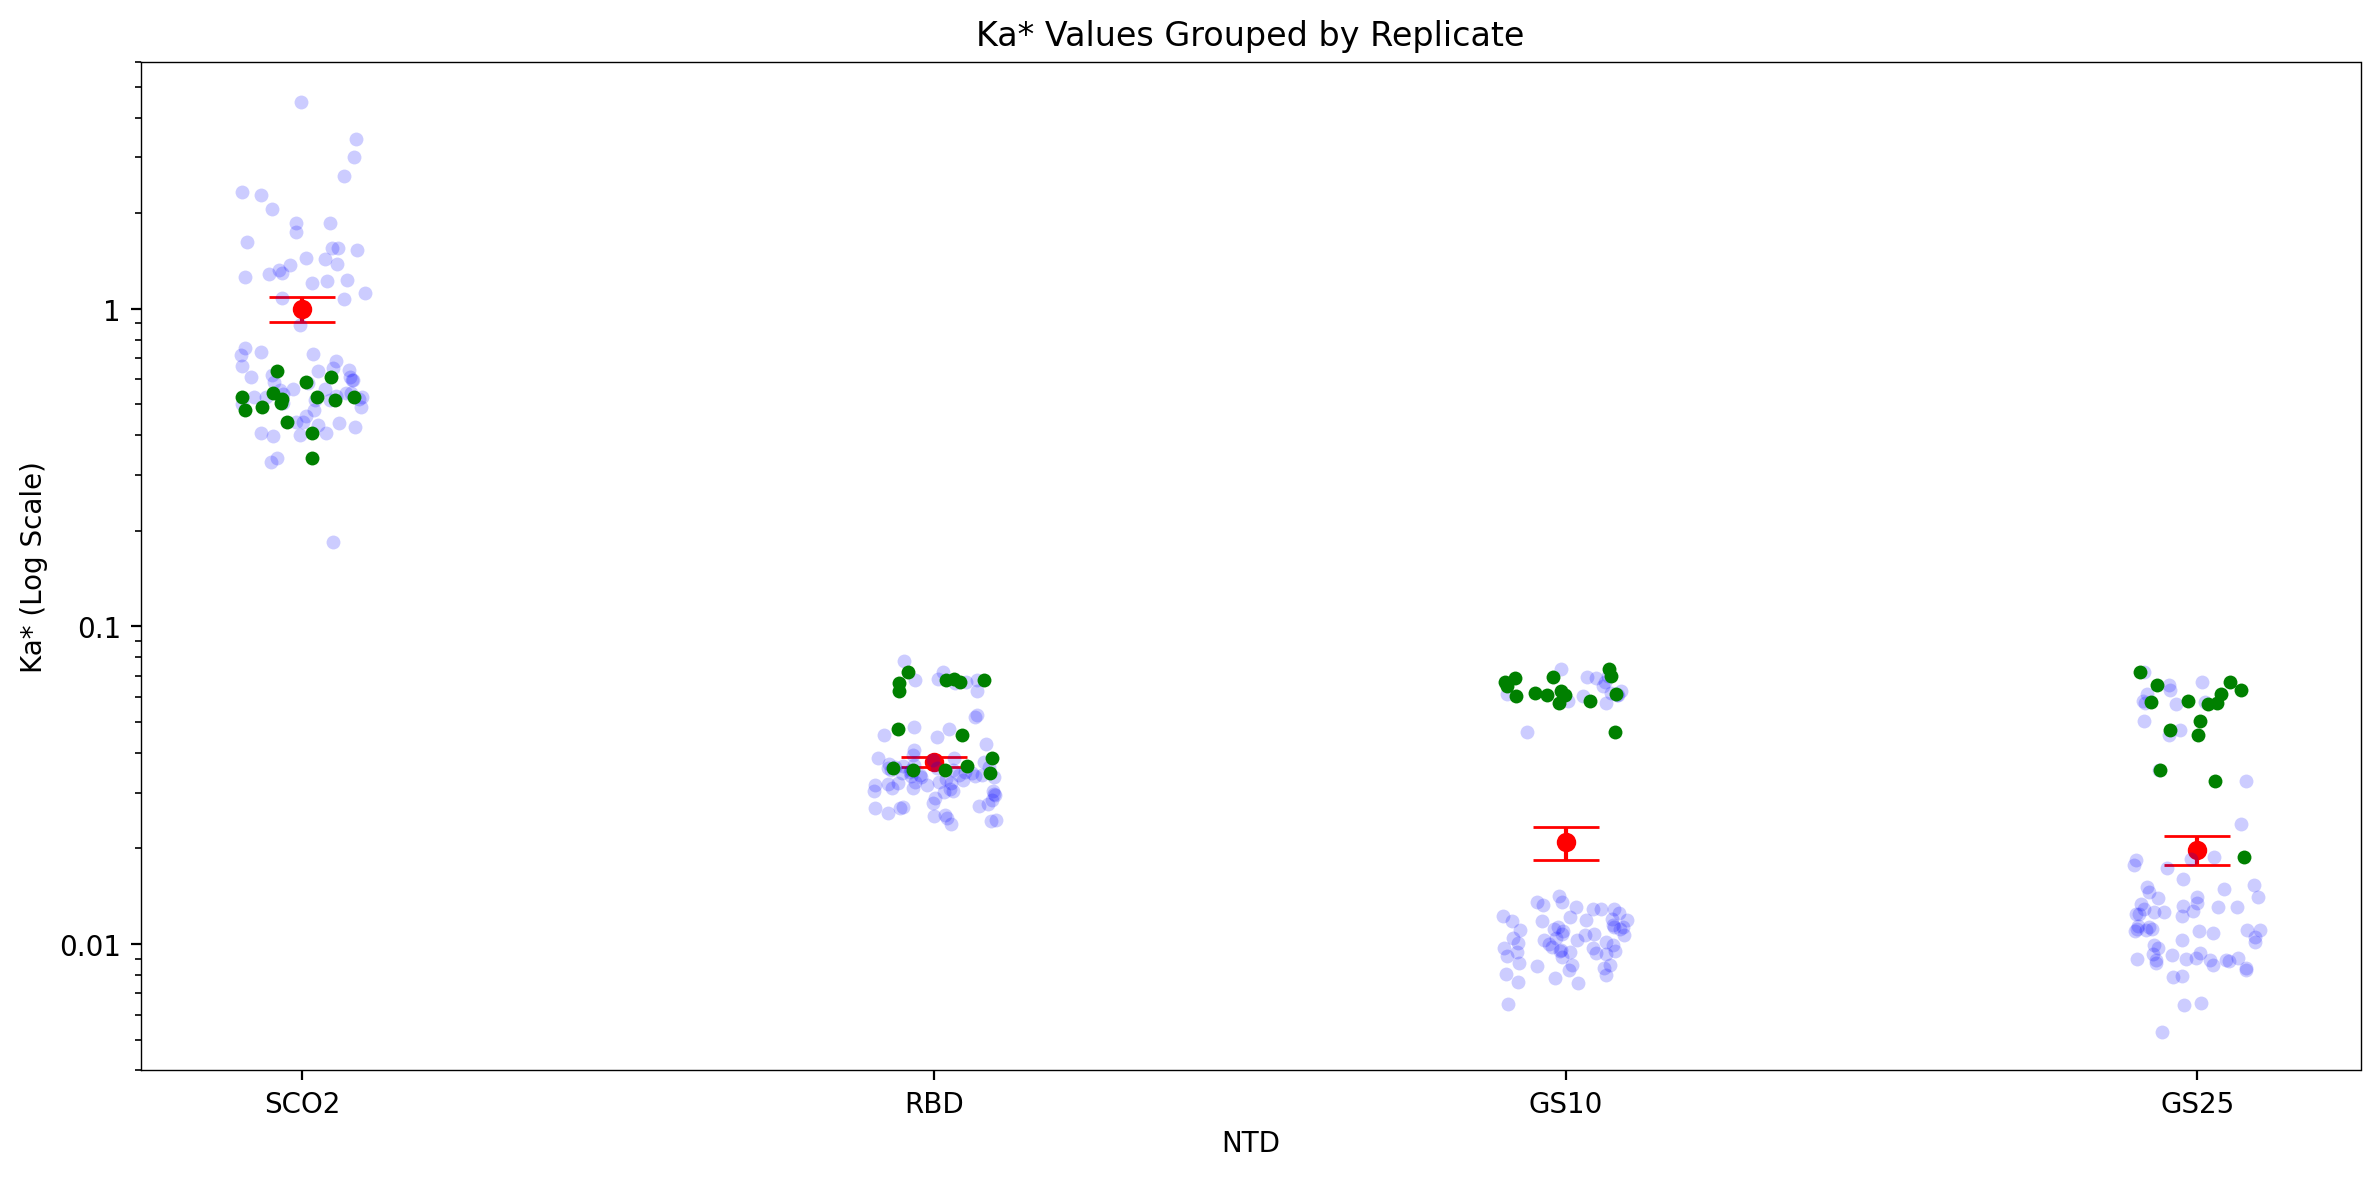

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_yscale('log')
ax.set_yticks([1, 0.1, 0.01])
ax.set_yticklabels(['1', '0.1', '0.01'])

order = ['SCO2', 'RBD', 'GS10', 'GS25']

# Create a strip plot (all replicates)
sns.stripplot(data=df_structured, x='NTD', y='Ka*', color='blue', alpha=0.2, order=order, ax=ax)

# Filtered strip plot (Replicate == '4')
filtered_data = df_structured[df_structured['Replicate'] == '4']
sns.stripplot(data=filtered_data, x='NTD', y='Ka*', color='green', order=order, ax=ax)

# Compute means and SEMs
grouped = df_structured.groupby('NTD')['Ka*'].agg(['mean', 'sem']).reindex(order)

# Add error bars manually
ax.errorbar(
    x=range(len(order)),
    y=grouped['mean'],
    yerr=grouped['sem'],
    fmt='o',
    color='red',
    capsize=12      
)

ax.set_ylim(0.004, 6)
ax.set_xlabel('NTD')
ax.set_ylabel('Ka* (Log Scale)')
ax.set_title('Ka* Values Grouped by Replicate')


fig.tight_layout()

fig.savefig('Analysis/Plots/GS_strip_plot4.png', format='png')
fig.savefig('Analysis/Plots/GS_strip_plot4.pdf', format='pdf')
plt.show()

In [8]:
# Group the data by 'NTD' and calculate mean and standard deviation
grouped = df_structured.groupby('NTD')['value'].agg(['mean', 'sem'])
print(grouped)

# Calculate the normalization term (mean and std when NTD is SCO2)
normalization_mean = grouped.loc['SCO2', 'mean']
normalization_sem = grouped.loc['SCO2', 'sem']

normalization_mean
normalization_sem

grouped['A'] = np.power(grouped['sem']/grouped['mean'],2)
grouped['B'] = np.power((df_structured[df_structured['NTD'] == 'SCO2']['value'].sem()/df_structured[df_structured['NTD'] == 'SCO2']['value'].mean()),2)


# Divide a column by the value corresponding to 'SCO2' in the 'mean' column
column_name = 'mean'  # Specify the column name you want to divide
division_column = grouped[column_name] / grouped.loc['SCO2', column_name]

grouped['Ratio'] = division_column

grouped['error'] = np.sqrt(grouped['A']+grouped['B']) * grouped['Ratio']

grouped


             mean          sem
NTD                           
GS10  0.000005339  0.000000628
GS25  0.000005057  0.000000528
RBD   0.000009562  0.000000367
SCO2  0.000255233  0.000022796


,mean,sem,A,B,Ratio,error
NTD,,,,,,
GS10,0.000005339,0.000000628,0.013855194,0.00797691,0.020919396,0.003090985
GS25,0.000005057,0.000000528,0.010897439,0.00797691,0.019814894,0.002722248
RBD,0.000009562,0.000000367,0.001476453,0.00797691,0.037465282,0.003642690
SCO2,0.000255233,0.000022796,0.007976910,0.00797691,1.000000000,0.126308436
